<a href="https://colab.research.google.com/github/mkhekare/GenerativeAI/blob/main/AmazonReviewsSentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Amazon Reviews Sentiment Analysis & Summarization

## 📝 Project Overview

This project involves pre-processing, analyzing, and modeling customer review data from Amazon to derive insights and perform sentiment classification. The major objectives include:

- Cleaning and tokenizing review text
- Performing lemmatization and POS tagging
- Computing TF-IDF and IDF values
- Training a Multinomial Naive Bayes classifier
- Evaluating performance with class-wise metrics
- Summarizing negative and mildly positive reviews

---

## 📁 Dataset

- **File Name**: `amazon_reviews.csv`
- **Key Columns**:
  - `Review`: Customer review text
  - `Rating`: Review rating (1 = Negative, 2 = Positive)
  
---

## 🔢 Steps and Tasks

### ✅ Q1: Pre-processing & IDF Calculation
- Take the first 10,000 reviews
- Lowercasing & remove punctuation
- Calculate word frequencies
- Compute IDF of all words
- Visualize:
  - Top 20 and bottom 20 words (based on frequency and WordCloud)

---

### ✅ Q2: NLP Pipeline
- Perform:
  - Word tokenization
  - POS tagging
  - Lemmatization using POS tags

---

### ✅ Q5: TF-IDF + Naive Bayes Classifier
- Use full dataset
- Train-test split: 80%-20%
- Generate TF-IDF features (vocab size: 50,000)
- Train a **Multinomial Naive Bayes** model
- Report **class-wise precision, recall, F1-score** on test set

---

### ✅ Q6: Text Summarization
- Extract:
  - First 1000 reviews with rating = 1.0 → Summarize to 1% (in words)
  - First 1000 reviews with rating = 2.0 → Summarize to ~100 words
- Method: LSA-based extractive summarization using `sumy` (due to gensim compatibility issues)

---

## ⚙️ General Notes

- `random_state = 50` used where applicable
- Pre-processing pipeline and model evaluation are fully executed in the accompanying `.ipynb` notebook
- Visualizations and summaries are included in the final `.pdf` report

---


Step 1: Preprocessing and IDF Calculation

In [28]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from collections import Counter
import nltk
nltk.download('all',quiet="True")
from nltk.tokenize import word_tokenize

# Set random seed
RANDOM_STATE = 50

Step 2: Load first 10,000 reviews and preprocess

In [29]:
# Step 2: Load first 10,000 reviews and preprocess
df = pd.read_csv('/content/amazon_reviews.csv')  # adjust path if needed
reviews = df['Review'].dropna().iloc[:10000]

# Lowercasing and removing punctuation
def preprocess(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

processed_reviews = reviews.apply(preprocess)

Step 3: Tokenize and count frequency

In [30]:
# Step 3: Tokenize and count frequency
all_tokens = []
for review in processed_reviews:
    tokens = word_tokenize(review)
    all_tokens.extend(tokens)

# Word frequency
word_freq = Counter(all_tokens)

Step 4: Plot top 20 and bottom 20 words by frequency

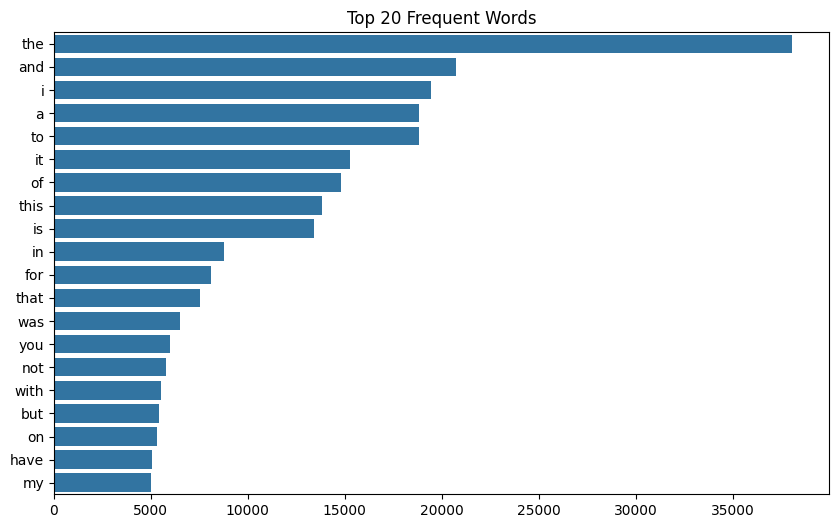

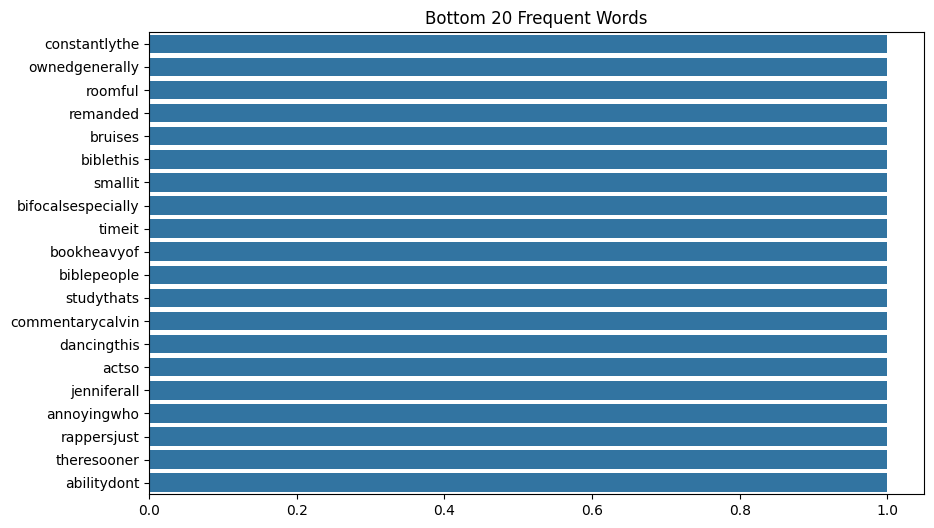

In [31]:
# Step 4: Plot top 20 and bottom 20 words by frequency
top_20 = word_freq.most_common(20)
bottom_20 = word_freq.most_common()[-20:]

# Top 20
top_words, top_counts = zip(*top_20)
plt.figure(figsize=(10,6))
sns.barplot(x=top_counts, y=top_words)
plt.title("Top 20 Frequent Words")
plt.show()

# Bottom 20
bottom_words, bottom_counts = zip(*bottom_20)
plt.figure(figsize=(10,6))
sns.barplot(x=bottom_counts, y=bottom_words)
plt.title("Bottom 20 Frequent Words")
plt.show()

Step 5: Generate Word Cloud

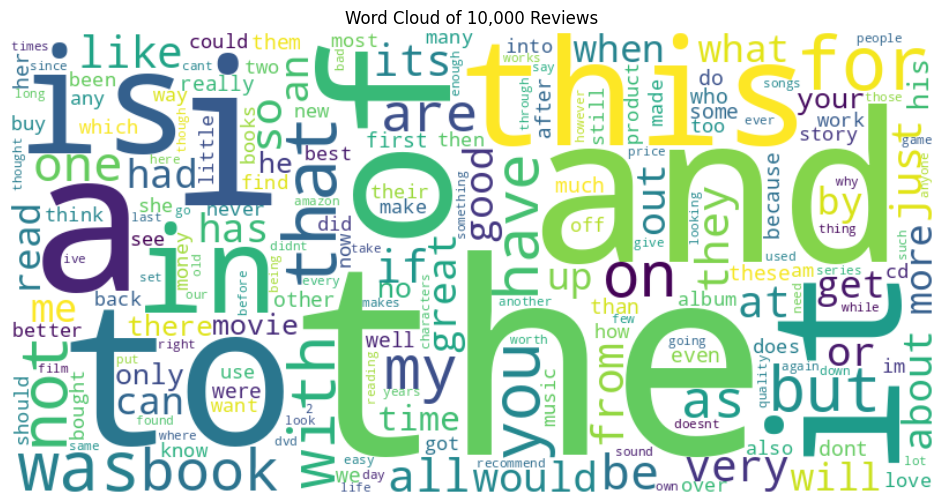

In [32]:
# Step 5: Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of 10,000 Reviews')
plt.show()

Step 6: Compute IDF using TfidfVectorizer

In [33]:
# Step 6: Compute IDF using TfidfVectorizer
tfidf = TfidfVectorizer(lowercase=True, stop_words='english')
tfidf_matrix = tfidf.fit_transform(processed_reviews)
idf_scores = dict(zip(tfidf.get_feature_names_out(), tfidf.idf_))

# Sort IDF values
idf_sorted = sorted(idf_scores.items(), key=lambda x: x[1])
idf_top_20 = idf_sorted[:20]
idf_bottom_20 = idf_sorted[-20:]

# Display
print("Top 20 Words by Lowest IDF (Common Words):")
for word, score in idf_top_20:
    print(f"{word}: {score:.4f}")

print("\nBottom 20 Words by Highest IDF (Rare Words):")
for word, score in idf_bottom_20:
    print(f"{word}: {score:.4f}")

Top 20 Words by Lowest IDF (Common Words):
book: 2.4046
like: 2.5694
just: 2.6328
great: 2.6962
good: 2.7105
time: 2.8919
dont: 3.0396
read: 3.0496
really: 3.0676
buy: 3.3678
bought: 3.3882
use: 3.4036
love: 3.4058
better: 3.4181
movie: 3.4735
work: 3.4878
did: 3.4963
think: 3.5097
way: 3.5334
does: 3.5422

Bottom 20 Words by Highest IDF (Rare Words):
äußerst: 9.5173
äèñ: 9.5173
äèòó: 9.5173
äóìà: 9.5173
écrire: 9.5173
él: 9.5173
ìéò: 9.5173
ìíäó: 9.5173
íí: 9.5173
íü: 9.5173
ñàìà: 9.5173
ñàìé: 9.5173
ñí: 9.5173
ñòèò: 9.5173
òà: 9.5173
òì: 9.5173
óè: 9.5173
óèòü: 9.5173
önde: 9.5173
único: 9.5173


# Que 2: Tokenization, Lemmatization, and POS Tagging

In [34]:
# Step 1: Install and import necessary libraries
import nltk
import spacy
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Downloads (only needed once)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [35]:
# Step 2: Load spaCy model for more advanced lemmatization (optional)
!python -m spacy download en_core_web_sm
import en_core_web_sm
nlp = en_core_web_sm.load()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 63.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Step 3: Sample subset to demonstrate (first 5 preprocessed reviews)

In [36]:
# Step 3: Sample subset to demonstrate (first 5 preprocessed reviews)
sample_reviews = processed_reviews.iloc[:5]
lemmatizer = WordNetLemmatizer()

# Helper function to map POS tags from nltk to wordnet format
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # default to noun

Step 4: Tokenization + Lemmatization + POS Tagging

In [37]:
# Step 4: Tokenization + Lemmatization + POS Tagging
for idx, review in enumerate(sample_reviews):
    print(f"\n--- Review {idx+1} ---\n")

    tokens = word_tokenize(review)
    tagged = pos_tag(tokens)

    print("{:<15} {:<10} {:<10}".format("Token", "POS", "Lemma"))
    print("-" * 35)

    for word, tag in tagged:
        lemma = lemmatizer.lemmatize(word, get_wordnet_pos(tag))
        print("{:<15} {:<10} {:<10}".format(word, tag, lemma))


--- Review 1 ---

Token           POS        Lemma     
-----------------------------------
lasted          VBN        last      
maybe           RB         maybe     
3               CD         3         
months          NNS        month     
with            IN         with      
2x              CD         2x        
a               DT         a         
week            NN         week      
wear            JJ         wear      
split           NN         split     
right           RB         right     
along           IN         along     
the             DT         the       
side            NN         side      
of              IN         of        
the             DT         the       
foot            NN         foot      
rendering       VBG        render    
them            PRP        them      
rather          RB         rather    
useless         NN         useless   
for             IN         for       
wet             NN         wet       
weather         NN         weathe

In [38]:
# OPTIONAL: POS and Lemmatization using spaCy (cleaner for advanced NLP tasks)
for idx, review in enumerate(sample_reviews):
    print(f"\n--- spaCy POS & Lemma for Review {idx+1} ---\n")
    doc = nlp(review)

    print("{:<15} {:<10} {:<10}".format("Token", "POS", "Lemma"))
    print("-" * 35)

    for token in doc:
        print("{:<15} {:<10} {:<10}".format(token.text, token.pos_, token.lemma_))



--- spaCy POS & Lemma for Review 1 ---

Token           POS        Lemma     
-----------------------------------
lasted          VERB       last      
maybe           ADV        maybe     
3               NUM        3         
months          NOUN       month     
with            ADP        with      
2x              NUM        2x        
a               DET        a         
week            NOUN       week      
wear            NOUN       wear      
split           VERB       split     
right           ADV        right     
along           ADP        along     
the             DET        the       
side            NOUN       side      
of              ADP        of        
the             DET        the       
foot            NOUN       foot      
rendering       VERB       render    
them            PRON       they      
rather          ADV        rather    
useless         ADJ        useless   
for             ADP        for       
wet             ADJ        wet       
weather    

# Que 3 : TF-IDF + Multinomial Naive Bayes Classification

In [39]:
# Step 1: Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

# Use full data (drop missing)
df = df[['Review', 'Sentiment']].dropna()

Step 2: Preprocess all reviews (lowercase + remove punctuation)

In [40]:
# Step 2: Preprocess all reviews (lowercase + remove punctuation)
def preprocess(text):
    text = text.lower()
    return text.translate(str.maketrans('', '', string.punctuation))

df['cleaned_review'] = df['Review'].apply(preprocess)

Step 3: Split data into train and test (80-20)

In [41]:
# Step 3: Split data into train and test (80-20)
X = df['cleaned_review']
y = df['Sentiment']  # 1 for negative, 2 for positive

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=50, stratify=y
)

Step 4: TF-IDF Vectorizer + Naive Bayes Pipeline

In [42]:
# Step 4: TF-IDF Vectorizer + Naive Bayes Pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=50000, stop_words='english')),
    ('nb', MultinomialNB())
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

Step 5: Report class-wise precision, recall, and F1-score

In [43]:
# Step 5: Report class-wise precision, recall, and F1-score
report = classification_report(y_test, y_pred, target_names=['Negative (1)', 'Positive (2)'])
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

Negative (1)       0.81      0.82      0.82      9967
Positive (2)       0.82      0.80      0.81     10033

    accuracy                           0.81     20000
   macro avg       0.81      0.81      0.81     20000
weighted avg       0.81      0.81      0.81     20000



#### ✅ Classification Report Summary

| Class         | Precision | Recall | F1-Score | Support |
|---------------|-----------|--------|----------|---------|
| Negative (1)  | 0.81      | 0.82   | 0.82     | 9,967   |
| Positive (2)  | 0.82      | 0.80   | 0.81     | 10,033  |
| **Accuracy**  |           |        | **0.81** | 20,000  |
| **Macro Avg** | 0.81      | 0.81   | 0.81     | 20,000  |
| **Weighted Avg** | 0.81   | 0.81   | 0.81     | 20,000  |

---

#### 🔍 **Interpretation**

- **Precision** for class `1 (Negative)` is **0.81**, meaning 81% of predicted negatives were truly negative.
- **Recall** for class `1` is **0.82**, so 82% of actual negatives were correctly identified.
- **F1-Score** of **0.82** for class `1` shows a strong balance between precision and recall.
- Similarly, class `2 (Positive)` has slightly higher precision (**0.82**) and comparable recall (**0.80**).
- The **overall accuracy** is **81%**, meaning 81% of total predictions were correct.
- **Macro Average** treats both classes equally, showing consistent performance across the classes.
- **Weighted Average** takes class imbalance into account and confirms balanced accuracy.

➡️ **Conclusion:** The Multinomial Naive Bayes model performs well on this sentiment classification task, with balanced precision, recall, and F1-scores around **81%**.


# Que 4: Summarization of 1000 Reviews per Rating

In [46]:
# Install required package
!pip install sumy --quiet

Import modules from sumy

In [47]:
# Import modules from sumy
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer  # You can also try LuhnSummarizer, LexRankSummarizer etc.

Extract and prepare review text

In [48]:
# Extract and prepare review text
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words

LANGUAGE = "english"
SENTENCES_COUNT_1 = 10  # Approx 1% of 1000 reviews if each review is a sentence
SENTENCES_COUNT_2 = 10  # Adjust for ~100 words

# Rating 1.0 Reviews
text_1 = ' '.join(df[df['Sentiment'] == 1].head(1000)['cleaned_review'])
parser1 = PlaintextParser.from_string(text_1, Tokenizer(LANGUAGE))
summarizer = LsaSummarizer(Stemmer(LANGUAGE))
summarizer.stop_words = get_stop_words(LANGUAGE)
summary_1 = summarizer(parser1.document, SENTENCES_COUNT_1)

print("\n📝 Summary for Rating-1.0 (1% words):\n")
for sentence in summary_1:
    print(str(sentence))


📝 Summary for Rating-1.0 (1% words):

lasted maybe 3 months with 2x a week wear split right along the side of the foot rendering them rather useless for wet weather what a complete waste get some real wellies i tried losening them but still werent comfortable they function as designed just not comfortable with something blocking my nose try holding your nose between 2 fingers if this is comfortable youll probably like the product i rarely write reviews but i felt misled by the other review available for this book the review is both wellwritten and encouraging unfortunately the same cant be said for ms berzons book its full of relationship clichés familiar to anyone who has watched daytime tv in the past 15 years alcohol can affect your sex life selfesteem issues can lead to infidelity there are a few gay cliches to distinguish this from the trite of the selfhelp books available for straights gay men are less likely to assume that monogamy is an integral part of committed relationship 

Rating 2.0 Reviews

In [49]:
# Rating 2.0 Reviews
text_2 = ' '.join(df[df['Sentiment'] == 2].head(1000)['cleaned_review'])
parser2 = PlaintextParser.from_string(text_2, Tokenizer(LANGUAGE))
summary_2 = summarizer(parser2.document, SENTENCES_COUNT_2)

print("\n📝 Summary for Rating-2.0 (~100 words):\n")
for sentence in summary_2:
    print(str(sentence))


📝 Summary for Rating-2.0 (~100 words):

unlike other reviewers i loved this book i went romping through it laughing all the way i salute patricia cornwells more than active imaginationhow different this genre than the usual patricia cornwell gory tales of the adventures of drscarpetta nonetheless cornwell shows the same mastery in isle of dogs in her description of her characters each of which in this case are wacky to the extreme and her departing of esoteric information which in this book is about archeology and the history of the chesapeake bay arearead this book for the absurd imagination of the writer and give dr scarpetta some time off after having my cat fod raided for the third time by our resident dogsmall horse i went looking for a container that would be space saving and secure for storing food this fit the bill perfectly now he is no longer able to have unauthorized snacks and i am saving money on expensive prescription cat food that he doesnt need to be eating it holds ab